In [166]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import markers
from matplotlib import colors
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['test', 'colors', 'trace', 'var']
`%matplotlib` prevents importing * from pylab and numpy



In [29]:
fbi_cities_ucr_since2010 = pd.read_csv(r'C:\Users\1017298\Desktop\Geophysics\Jobs\DataIncubator\fbi_cities_ucr_since2010.csv')

cities_missing_data = list(set(fbi_cities_ucr_since2010[fbi_cities_ucr_since2010['normalized_actual'].isnull()]['city']))
homicides = fbi_cities_ucr_since2010[(fbi_cities_ucr_since2010['offense']=='homicide')&
                                    ~(fbi_cities_ucr_since2010['city'].isin(cities_missing_data))]

years = set(homicides['data_year'])
cities = set(homicides['city'])
print('number of years: ',len(years))
print('number of cities: ',len(cities))

homicides

number of years:  8
number of cities:  35


,ori,city,data_year,offense,cleared,actual,year,population,normalized_actual
3,AL0010200,Birmingham,2010,homicide,0,20,2010.0,211670.0,0.944867
15,AL0010200,Birmingham,2011,homicide,0,54,2011.0,211458.0,2.553699
27,AL0010200,Birmingham,2012,homicide,0,67,2012.0,212835.0,3.147978
39,AL0010200,Birmingham,2013,homicide,41,63,2013.0,211933.0,2.972638
51,AL0010200,Birmingham,2014,homicide,37,52,2014.0,212653.0,2.445298
63,AL0010200,Birmingham,2015,homicide,44,79,2015.0,214911.0,3.675940
75,AL0010200,Birmingham,2016,homicide,50,78,2016.0,213434.0,3.654526
87,AL0010200,Birmingham,2017,homicide,15,59,2017.0,212744.0,2.773286
195,AZ0072300,Phoenix,2010,homicide,84,116,2010.0,1449481.0,0.800286
207,AZ0072300,Phoenix,2011,homicide,83,116,2011.0,1469484.0,0.789393


#### 1. Standardize the dataset

input X should be array shape (n_samples, n_features)

In [63]:
years = set(homicides['data_year'])

homicides_by_year = []
for y in years:
    homicides_by_year.append(list(homicides[homicides['data_year']==y]['normalized_actual']))
    
# homicides_by_city = []
# for c in cities:
#     homicides_by_city.append(list(homicides[homicides['city']==c]['normalized_actual']))
    
pca_homicide_input = np.array(homicides_by_year)

print(len(pca_homicide_input))
pca_homicide_input

8


array([[3.65452552, 0.90400182, 0.56530178, 2.02387217, 0.45836978,
        1.59579492, 0.44168514, 0.49453432, 0.80801085, 1.98188411,
        1.85191718, 0.76887998, 2.34917652, 2.83922343, 1.73605816,
        0.        , 4.44450121, 5.17355824, 0.72825635, 4.48851045,
        0.84613618, 6.03717358, 2.49638183, 1.09070753, 1.71267535,
        0.39237858, 3.39545372, 0.25014266, 1.74121357, 1.87732195,
        3.06395078, 1.30620364, 0.46513791, 0.24135454, 2.36946914],
       [2.7732862 , 0.96550918, 0.85872804, 1.62275049, 0.30907333,
        1.77147348, 0.81688223, 0.62436756, 0.83732957, 1.67153718,
        1.94235941, 1.01187526, 1.62451496, 2.40386208, 1.81948387,
        0.        , 3.99194492, 5.59145129, 0.83453511, 3.93699033,
        0.99449241, 6.64234381, 3.19459941, 1.25322706, 1.54683826,
        0.33864111, 2.77524173, 0.37030122, 1.99890819, 1.81869887,
        2.77509042, 1.16287615, 0.3817741 , 0.37253506, 1.98197744],
       [0.94486701, 0.80028645, 0.97863881, 2.

#### 2. Create a covariance matrix

In [65]:
pca = PCA(n_components=len(cities))
# pca = PCA(n_components=len(years))
pca

PCA(copy=True, iterated_power='auto', n_components=35, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### 3. Calculate eigenvalues
The number of eigenvalues seems to be the lesser of the number of samples (years) or the number of features (cities).

In [99]:
covar_matrix = pca.fit(pca_homicide_input)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([61.8, 76.8, 87.7, 93.5, 96.4, 98.5, 99.9, 99.9])

#### 4. Sort and select

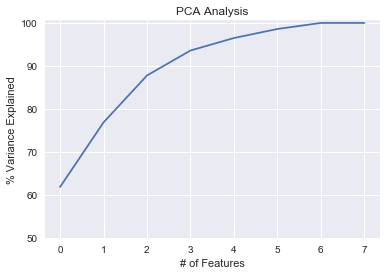

In [68]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(50,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

#### Plot results with 6 components?

In [184]:
n_features = 4
pca_result = PCA(n_components=n_features)
result = pca_result.fit_transform(pca_homicide_input)
result

array([[ 2.67531885,  1.08569645,  0.23924847,  0.19678237],
       [ 3.10266857, -0.19492113,  0.77496523,  0.21631166],
       [-1.44278282, -1.16480005,  1.36266643, -0.63553363],
       [-2.25353149,  0.56033756,  0.15505727, -0.34123382],
       [-1.75818748,  1.72674321,  0.0747383 ,  0.08041866],
       [-1.294318  , -0.33655365, -1.06490358,  0.45747516],
       [-0.56401342, -1.1701022 , -0.18600318,  1.04322167],
       [ 1.5348458 , -0.50640018, -1.35576893, -1.01744208]])

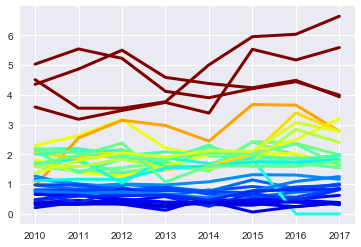

In [85]:
# assign colors to cities

city_colors = {}
city_hom_ave = {}
for city in cities:
    city_df = homicides[homicides['city']==city]
    calc_color = plt.cm.jet(city_df['normalized_actual'].max()/5)
    city_colors[city] = calc_color
    city_hom_ave[city] = city_df['normalized_actual'].mean()
    plt.plot(city_df['data_year'],city_df['normalized_actual'],lw=3,c=calc_color)#,label=city)


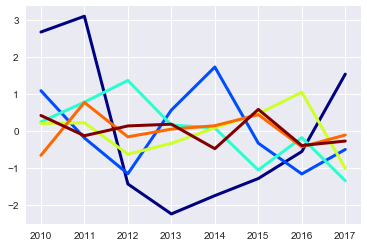

In [157]:
for n,c in zip(np.arange(n_features),plt.cm.jet(np.linspace(0,1,n_features))):
    x = sorted(list(years))
    y = result[:,n]
    plt.plot(x,y,lw=3,c=c)

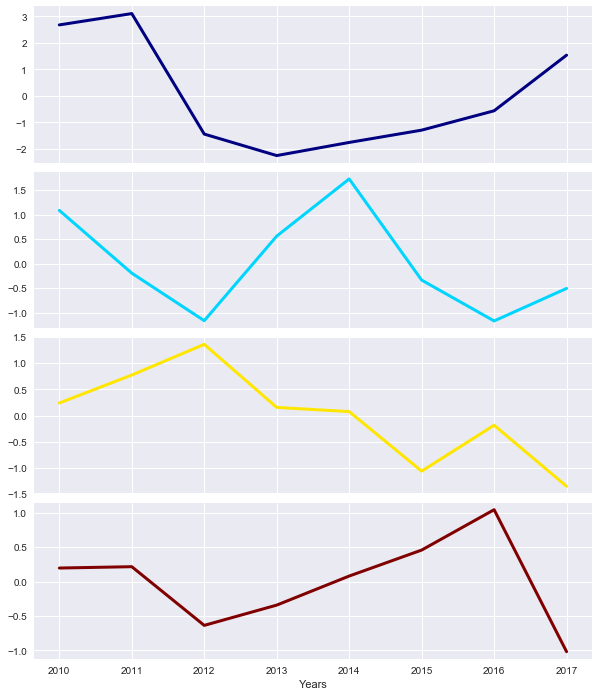

In [185]:
# SET FIGURE SIZE AND GRID DIMENSIONS
matplotlib.rcParams.update({'font.size': 28})

fig_length = 12
number_of_plots = n_features
plot_length = fig_length/number_of_plots

fig, ax = plt.subplots(figsize=(10,fig_length))
gs = gridspec.GridSpec(fig_length,number_of_plots)


for n,c in zip(np.arange(n_features),plt.cm.jet(np.linspace(0,1,n_features))):
    
    start = math.floor(plot_length * n)
    end = math.floor(plot_length * (n+1))
    ax = subplot(gs[start:end,0:number_of_plots])
    
    x = sorted(list(years))
    y = result[:,n]
    plt.plot(x,y,lw=3,c=c)
    
    # LABEL AXES
    if n+1 != number_of_plots:
        ax.tick_params(labelbottom=False)   
    else:
        plt.xlabel('Years') 
        
#     plt.ylabel('Homicide rate')
#     plt.legend(loc='upper left', bbox_to_anchor=(0.64, 0.9), frameon=False)#, labelspacing=1.6)#, prop={'weight':'bold'})
    
#     ylim = ax.get_ylim()[1]
#     xlim = ax.get_xlim()[1]
#     print(ylim)
#     print(xlim)
#     plt.text(0.8*xlim,0.8*ylim,r'component' + str(n+1))
    

In [4]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()

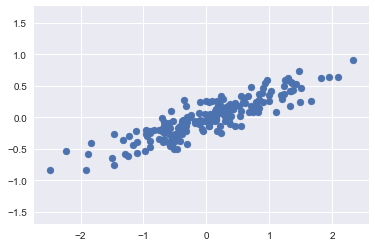

In [22]:
# rng = np.random.RandomState(1)
# X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
# plt.scatter(X[:, 0], X[:, 1])
# plt.axis('equal');

In [7]:
type(X[0])

numpy.ndarray

In [12]:
type(X[:, 0])

numpy.ndarray